# Object Detection Analysis

## Objective
In this notebook, we will analyze the object detection results obtained from YOLOv5. The analysis will cover:

- Retrieving detection data from the database
- Summarizing object detection results
- Visualizing confidence scores and object classes
- Overlaying detected bounding boxes on images


In [1]:
import pandas as pd
import os
os.chdir(r'c:\users\ermias.tadesse\10x\Centralize-Ethiopian-medical-business-data')
from scripts.db_connection import DBConnection

# Initialize DBConnection
db = DBConnection(dbname='Central_Medical_Warehouse', user='postgres', password='Ermi@123')

# Connect to the database
db.connect()

# Query to retrieve the detection data
query = """
SELECT 
    media_id, 
    object_class, 
    confidence, 
    bounding_box 
FROM 
    detections;
"""

# Load the detection data into a pandas DataFrame
df_detections = pd.read_sql_query(query, db.engine)
df_detections.head()  # Show the first few rows of the DataFrame


Successfully connected to the database!


,media_id,object_class,confidence,bounding_box
0,272,bottle,0.581503,"353.0731201171875,90.54412841796875,675.661376..."
1,271,bottle,0.306296,"350.8831481933594,0.0,830.5314331054688,1189.8..."
2,270,bowl,0.672652,"237.32164001464844,583.221923828125,734.137390..."
3,269,vase,0.254205,"170.67620849609375,42.87076187133789,332.53372..."
4,263,cup,0.747178,"71.85611724853516,246.93914794921875,146.89619..."


## Data Analysis

In this section, we will summarize the detection results, including the distribution of confidence scores and the frequency of detected object classes.


In [2]:
# Summary statistics for confidence scores
confidence_summary = df_detections['confidence'].describe()
print("Confidence Score Summary:")
print(confidence_summary)

# Count of object detections by class
class_counts = df_detections['object_class'].value_counts()
print("\nObject Detection Counts by Class:")
print(class_counts)


Confidence Score Summary:
count    43.000000
mean      0.506788
std       0.184874
min       0.254205
25%       0.371043
50%       0.474165
75%       0.647123
max       0.857504
Name: confidence, dtype: float64

Object Detection Counts by Class:
object_class
bottle      15
person       7
cup          5
bowl         4
book         4
vase         3
clock        2
toilet       2
suitcase     1
Name: count, dtype: int64


## Visualization

We will visualize the distribution of confidence scores and plot the most frequent object classes.


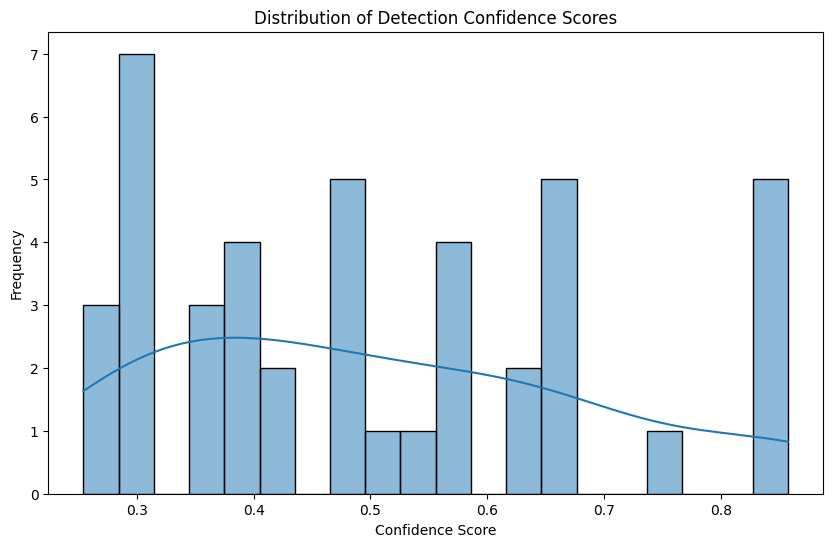

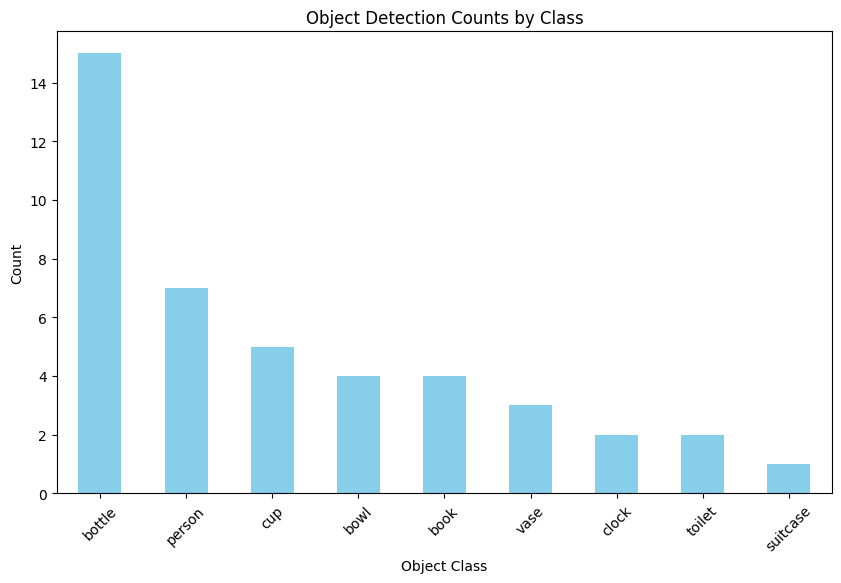

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of confidence scores
plt.figure(figsize=(10, 6))
sns.histplot(df_detections['confidence'], bins=20, kde=True)
plt.title('Distribution of Detection Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

# Plot the object detection counts by class
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Object Detection Counts by Class')
plt.xlabel('Object Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Conclusion

In this notebook, we analyzed the YOLOv5 object detection results. We visualized the detection confidence scores and object classes, and we overlaid bounding boxes on sample images. The detection data was exported for further use.
